In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
os.chdir("C:\\Users\\Swanko\\Downloads")#changing working directory 
print(os.getcwd())


C:\Users\Swanko\Downloads


In [3]:
application_data=pd.read_csv("application_data.csv")
application_data.head()





,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data.shape

(307511, 122)

In [5]:
# so there are total 307511 clients and 122 column of information abt client.

C:\Users\Swanko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


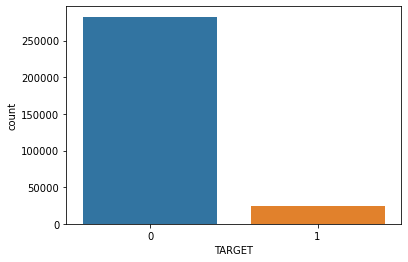

In [6]:
# checking distribution for target client
defaulter=application_data[application_data.TARGET==1]
nondefaulter=application_data[application_data.TARGET==0]
sns.countplot(application_data.TARGET)
plt.show()


In [7]:
#It is an unbalance data as number of defaulter are more than non defaulter(as 1 stands for person who doesot pay loan o time)

defaulters=application_data[application_data.TARGET==1]
nondefaulters=application_data[application_data.TARGET==0]
percentage_nondefaulters=(len(nondefaulters)/len(application_data))*100
percentage_defaulters=(len(defaulters)/len(application_data))*100
print("The Percentage of people who have paid their loan is:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(nondefaulters)/len(defaulters),2))



The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


In [8]:
#since step 1 is completed we will start with cleansing of data 
#we are ask not to drop any data from the data set 
#lets find the null value in data.

In [9]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [10]:
#calculating meta-data for application_data
app_meta_data=meta_data(application_data)
app_meta_data.head(20)

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


In [11]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
application_data=application_data[cols_to_keep]
application_data.describe()


,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,134133.000000,137829.000000,137829.000000,137829.000000,143620.000000,143620.000000,143620.000000,151450.000000,151450.00000,151450.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.502130,0.027022,0.028358,0.028236,0.078078,0.078942,0.074490,0.117850,0.11744,0.114231,...,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.211062,0.070254,0.069523,0.070166,0.134467,0.134576,0.132256,0.109076,0.10824,0.107936,...,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,102790.175348
min,0.014568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7197.000000,-24672.000000,-17912.000000,-25229.000000,0.000290,100002.000000
25%,0.334007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058300,0.05770,0.052500,...,1.000000,0.000000,1.000000,1.000000,-4299.000000,-7479.500000,-2760.000000,-19682.000000,0.010006,189145.500000
50%,0.505998,0.001100,0.003600,0.003100,0.000000,0.000000,0.000000,0.086400,0.08760,0.084000,...,1.000000,0.000000,1.000000,1.000000,-3254.000000,-4504.000000,-1213.000000,-15750.000000,0.018850,278202.000000
75%,0.675053,0.023100,0.027700,0.026600,0.120000,0.120000,0.120800,0.148900,0.14850,0.143900,...,1.000000,0.000000,1.000000,1.000000,-1720.000000,-2010.000000,-289.000000,-12413.000000,0.028663,367142.500000
max,0.962693,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,365243.000000,-7489.000000,0.072508,456255.000000


In [12]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(app_meta_data[(app_meta_data.Percent>0)&(app_meta_data.Percent<15)])
low_missing

,Total,Percent,Unique,Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,25,float64
NAME_TYPE_SUITE,1292,0.420148,7,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64


Explanation for treatment of columns with low missing values
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
We can impute missing values in these columns above with 0s and assume that no enquiry was made during the time reflected in null rows.

NAME_TYPE_SUITE - we should leave empty values as it is or impute it with "Others A" or "Others B" depending on what they mean.
OBS_30_CNT_SOCIAL_CIRCLE & related fields.
EXT_SOURCE_2
AMT_GOODS_PRICE
CNT_FAM_MEMBERS
AMT_ANNUITY
DAYS_LAST_PHONE_CHANGE
We should not add any additional info in missing values of these columns above as it would lead to noise and exaggeration.

Let's take look at all the columns names for different data types



In [13]:
application_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [14]:
application_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTA

In [15]:
application_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

A lot of the int columns look like Flags, let check their unique values

In [16]:
application_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

Notice a lot of "int" columns have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.

In [17]:
#columns to convert
cols_to_convert=list(app_meta_data[(app_meta_data.Unique==2)&(app_meta_data.Data_Type=="int64")].index)

#function to conver columns
def convert_data(application_data, cols_to_convert):
    for y in cols_to_convert:
        application_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application_data

#calling the function for application_data
convert_data(application_data, cols_to_convert)
application_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
application_data.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

Univariate Analyis on Categorical Columns


In [18]:
defaulters=application_data[application_data.TARGET==1]

nondefaulters=application_data[application_data.TARGET==0]

Getting a list of columns with dtype=object, to identify columns for categorical analysis

In [19]:
application_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUS

In [20]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()


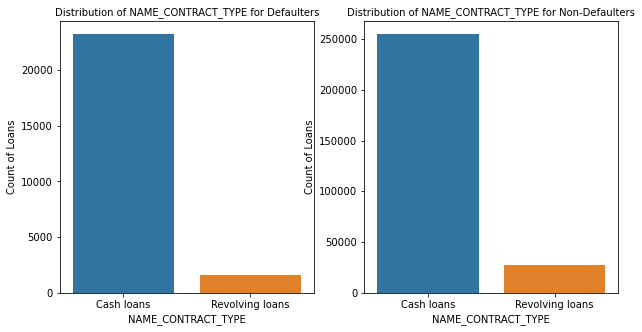

In [21]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

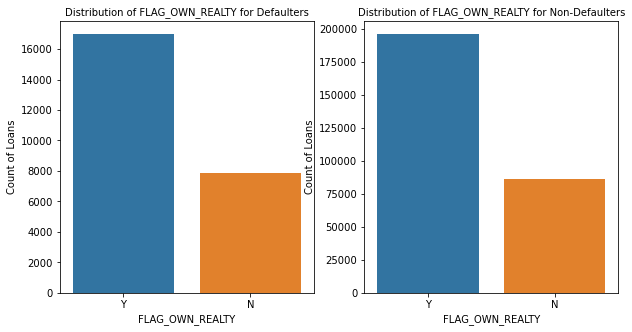

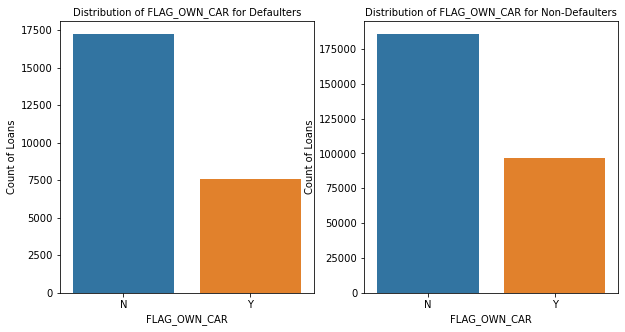

In [22]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

We observe that the number of most people applying for loan do not own a car.

We also observe that the ratio of people who own a car is higher for non-defaulters


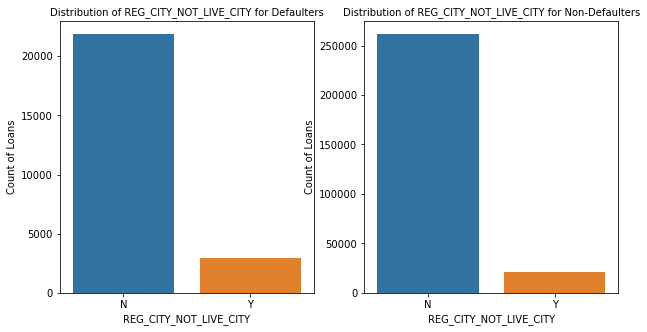

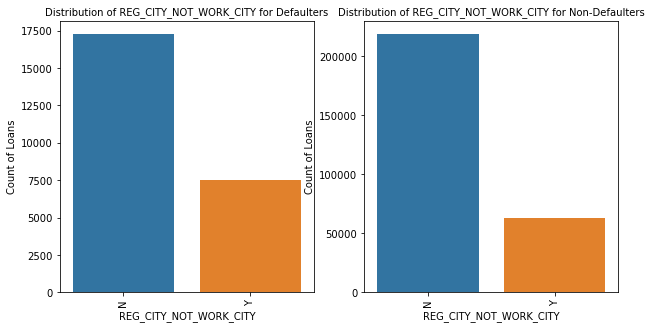

In [23]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

We observe that the Ratio of people whose Registration City is not the same as live city or work city is higher in case of defaulters are compared to defaulters.

It tells us that people who live or work in a city different than the registration city are more likely to have payment difficulties.

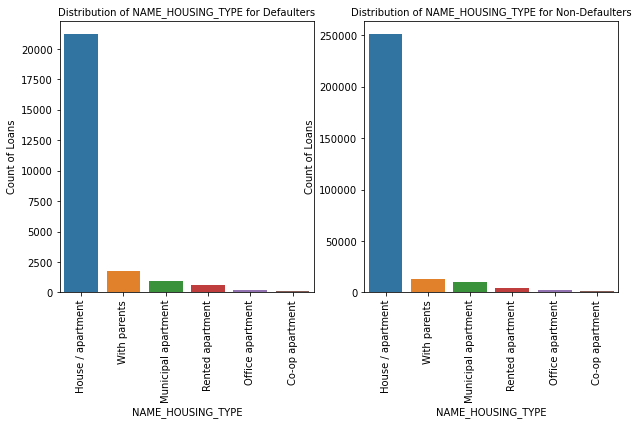

In [24]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)


Observation:

1)Most people live in a House/Apartment

2)Ratio of People who live With Parents is more for defaulter than non-defaulters. 

It tells us that applicant who live with parents have a higher chance of having payment difficulties.

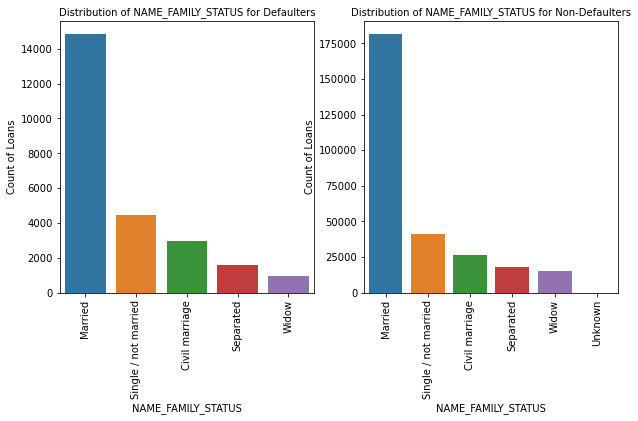

In [25]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

Ratio of Single/Unmarried people is more in the left graph.

Single/Unmarried people are more likely to be defaulters

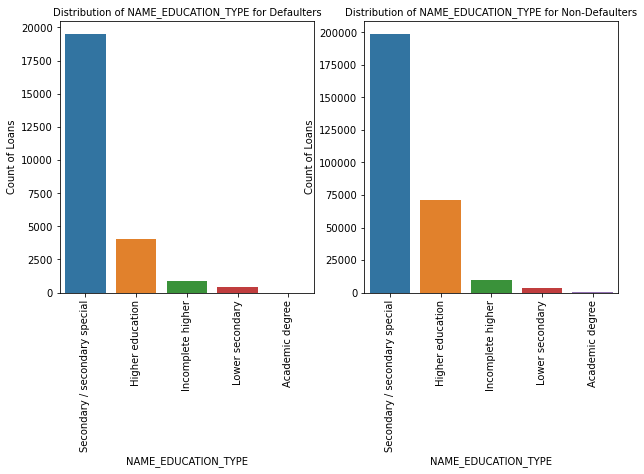

In [26]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

While the category with highest count remains same.

This chart tells us that people with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.

People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.

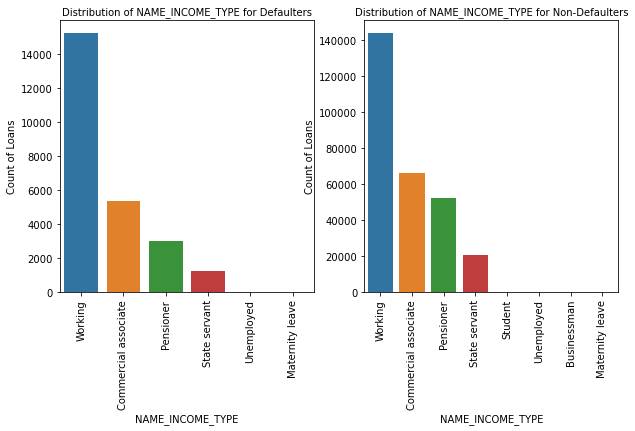

In [27]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

Commercial associates, Pensioner, State Servants have a higher ratio to total in non-defaulters.

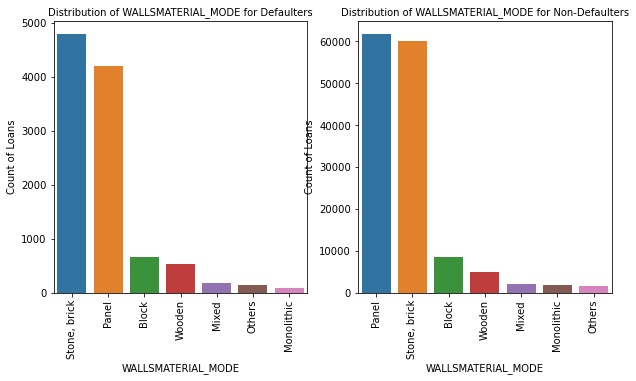

In [28]:
plot_charts('WALLSMATERIAL_MODE', label_rotation=True,horizontal_layout=True)


This interesting chart tells us that most defaulters have houses made of stone and brick while most non-defaulters have houses made of Panel

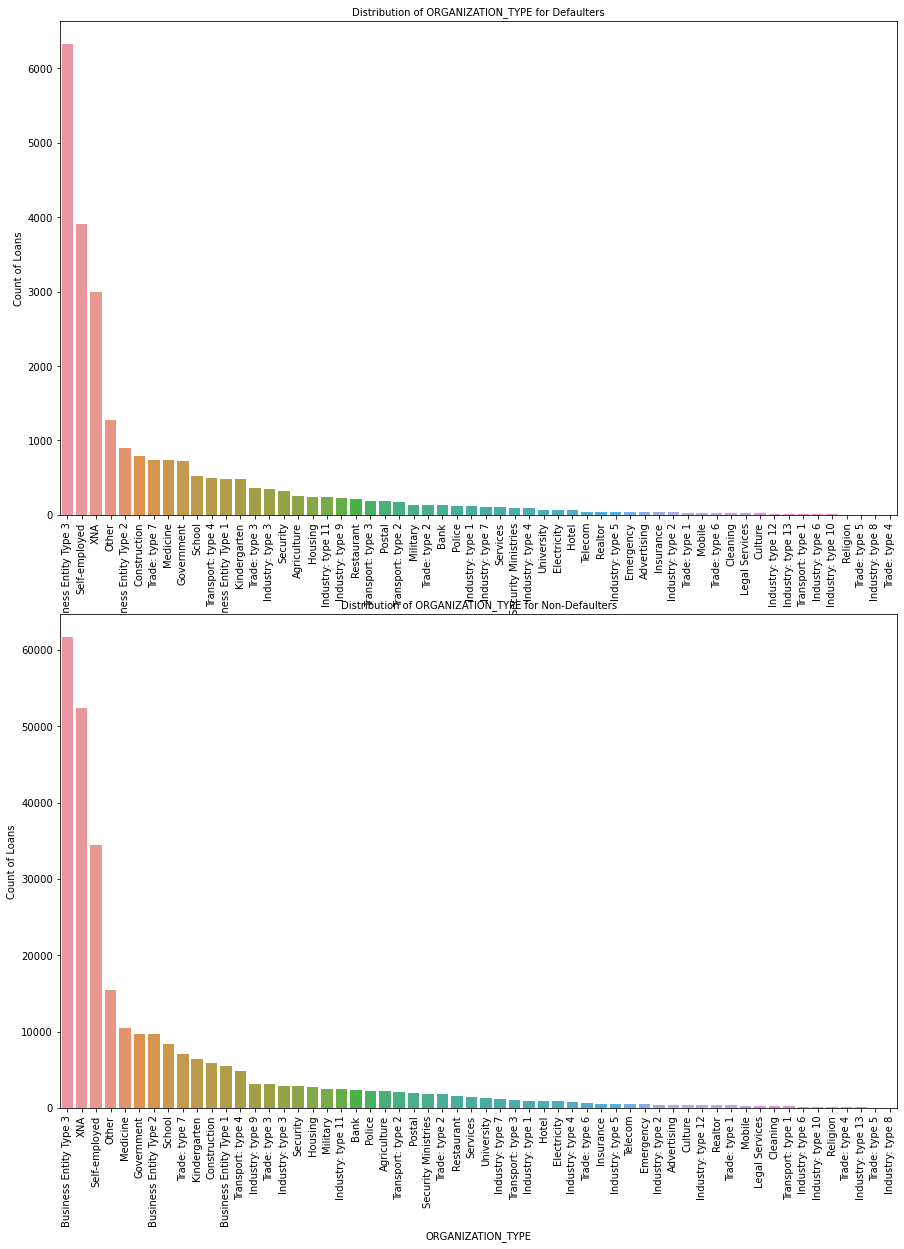

In [29]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

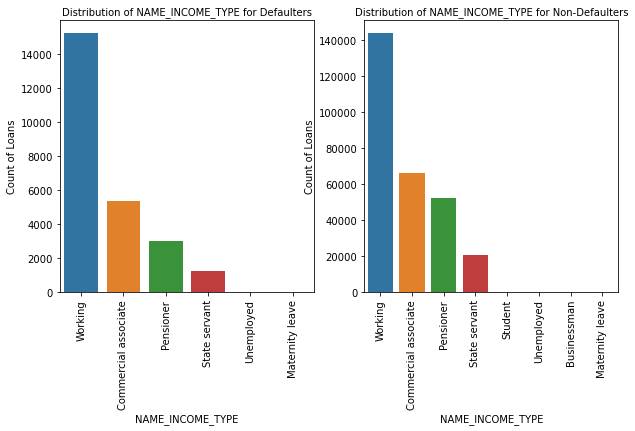

In [30]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

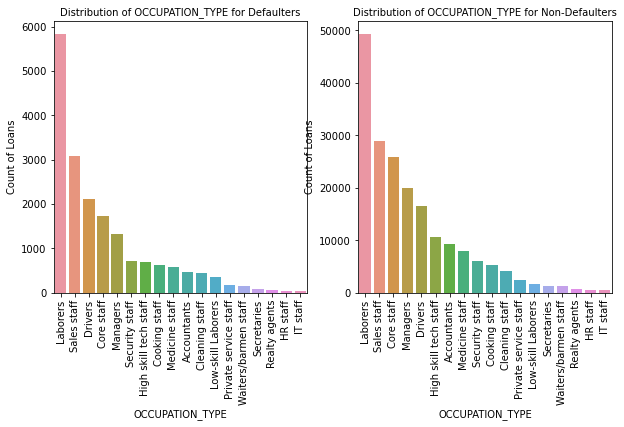

In [31]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

## Univariate & Bivariate Analyis on Numeric Columns

Getting a list of columns with dtype=object, to identify columns for analysis

In [32]:
application_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTA

In [33]:
application_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

## REMOVING OUTLIERS

In [34]:
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

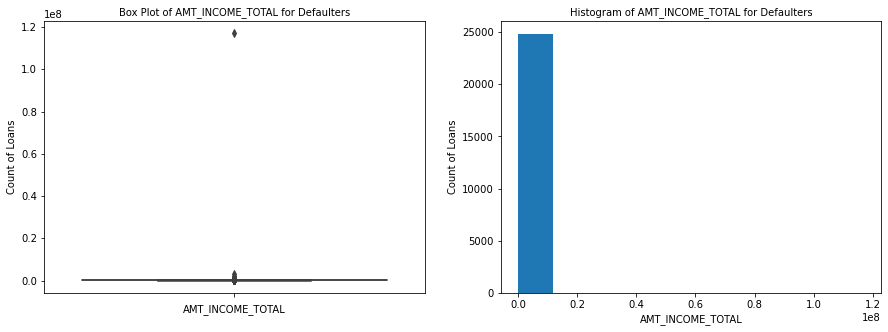

In [35]:
plot_boxhist('AMT_INCOME_TOTAL')

#We can see that there are some outliers and the graph looks like this to accomodate those outliers.

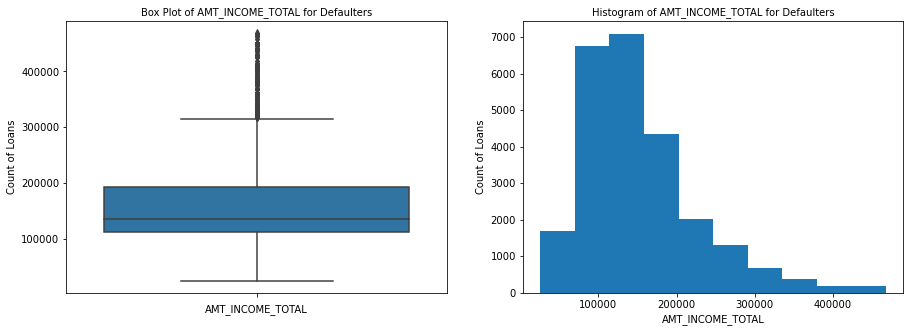

In [36]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

This tell us that most people with payment have incomes in the lower range between 100000 to 200000 which some on the higher end some on the lower

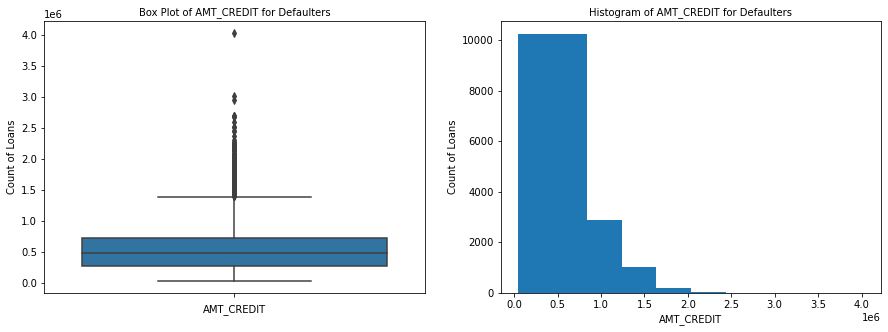

In [37]:
plot_boxhist('AMT_CREDIT')

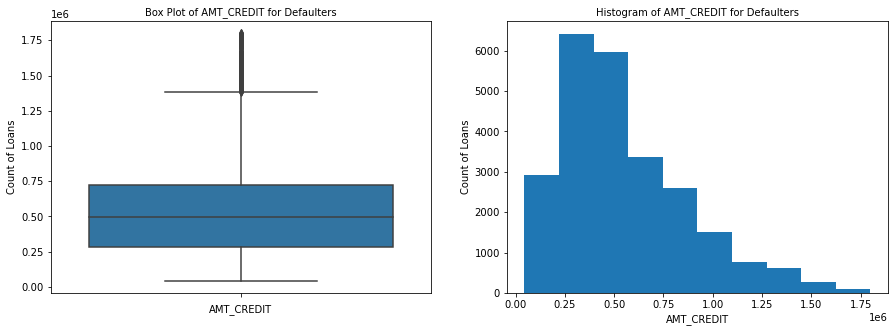

In [38]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_CREDIT<np.nanpercentile(application_data['AMT_CREDIT'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_CREDIT')

we observe that the credit amount lies between 250000 to around 500000 for defaulters

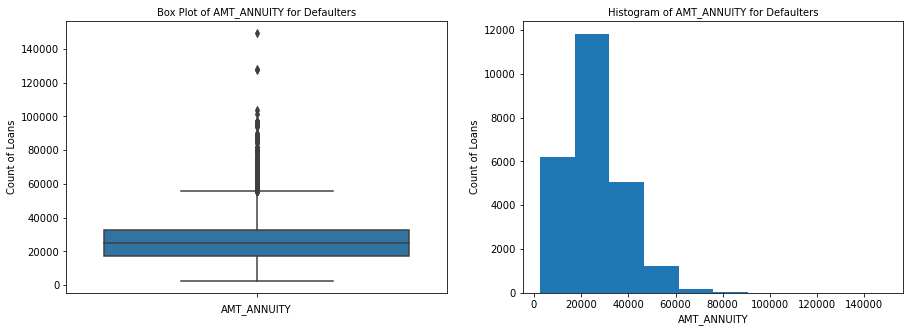

In [39]:
plot_boxhist('AMT_ANNUITY')

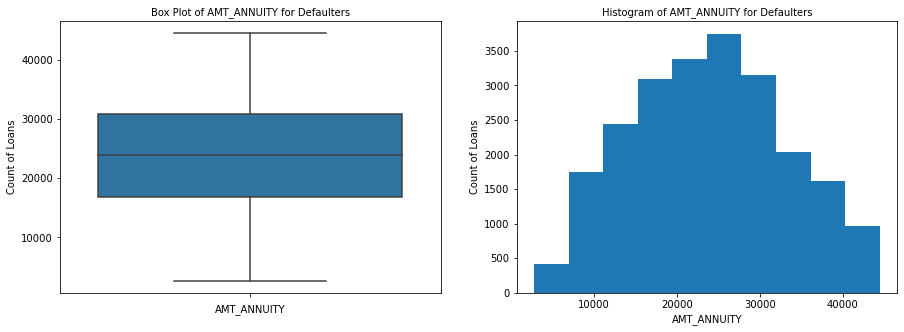

In [40]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_ANNUITY<np.nanpercentile(application_data['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_ANNUITY')

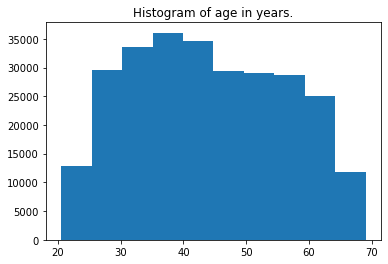

In [41]:
#Deriving new metric Age from Days Birth
application_data['AGE'] = application_data['DAYS_BIRTH'] / -365
plt.hist(application_data['AGE']);
plt.title('Histogram of age in years.');

age seem to be fairly distriuted

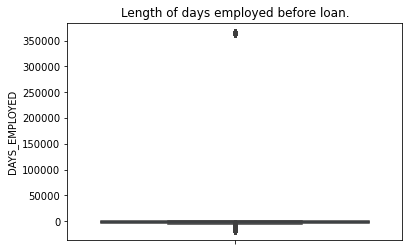

In [42]:
sns.boxplot(y=application_data['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');

In [43]:
application_data['DAYS_EMPLOYED'].describe()

count    270624.000000
mean      66967.610744
std      143809.691359
min      -17912.000000
25%       -2690.000000
50%       -1165.000000
75%        -258.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

There is an outlier here. The max value is 365243 days which is not practically possible. This might be an error and we can replace this value with null

In [44]:
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].replace(365243, np.nan)
application_data['DAYS_EMPLOYED'].describe()

count    219590.000000
mean      -2353.333813
std        2333.721637
min      -17912.000000
25%       -3126.000000
50%       -1612.000000
75%        -749.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

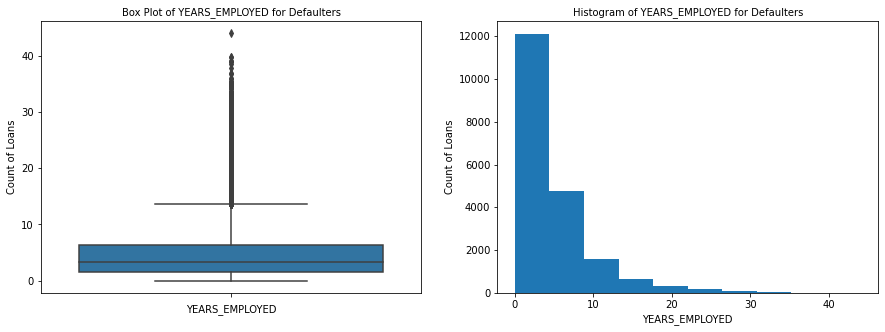

In [45]:
#Deriving variable "Years Employed" from days employed
application_data['YEARS_EMPLOYED'] = (application_data['DAYS_EMPLOYED']/-365)

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]
plot_boxhist('YEARS_EMPLOYED')

A large number of entries have 0 which means, a lot of people don't work.

In [46]:
application_data.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})

YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                5.544292  4.838356       3   7.175342  52.487671
Commercial associate       5.730061  4.010959   58866  48.071233  39.413699
Maternity leave            6.453425  6.260274       4   9.942466  37.649315
Pensioner                 13.550137  7.673973      10  35.246575  60.506849
State servant              9.276139  7.008219   18445  48.172603  40.482192
Student                    6.765582  4.954795      16  21.931507  41.215068
Unemployed                      NaN       NaN       0        NaN  46.832877
Working                    6.377079  4.347945  142246  49.073973  39.679452

We see that Pensioners comprise a lot of non-working people, which is normal. Working people seemed to have worked for many years.

In [47]:
application_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Commercial associate    230700.000000  225000.0   
                              Pensioner               163620.000000  135000.0   
                              State servant           230062.500000  198000.0   
                              Working                 206100.000000  180000.0   
Higher education              Businessman             195000.000000  180000.0   
                              Commercial associate    201003.446086  180000.0   
                              Maternity leave         112500.000000  112500.0   
                              Pensioner               151193.659642  135000.0   
                              State servant           183217.739153  171000.0   
                              Student                 164700.000000  171000.0   
                              Unemployed              204300.000000  225000.0   
                              Working                 173712.264383  157500.0   
Incomplete higher             Commercial associate    182876.896934  164623.5   
                              Pensioner               141442.696352  135000.0   
                              State servant           165287.840000  157500.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              126000.000000   63000.0   
                              Working                 158877.631087  135000.0   
Lower secondary               Commercial associate    157017.140515  135000.0   
                              Pensioner               103467.097166   90000.0   
                              State servant           135703.125000  112500.0   
                              Working                 134821.250000  126000.0   
Secondary / secondary special Commercial associate    167227.792605  157500.0   
                              Maternity leave          58500.000000   58500.0   
                              Pensioner               124717.747472  112500.0   
                              State servant           149828.084681  135000.0   
                              Student                 130050.000000  128250.0   
                              Unemployed               70322.727273   63000.0   
                              Working                 145718.602949  135000.0   

                                                                      
                                                     count       max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate      30  450000.0  
                              Pensioner                 20  315000.0  
                              State servant             16  450000.0  
                              Working                   60  450000.0  
Higher education              Businessman                3  225000.0  
                              Commercial associate   17990  468000.0  
                              Maternity leave            2  135000.0  
                              Pensioner               6893  450000.0  
                              State servant           7065  450000.0  
                              Student                    5  225000.0  
                              Unemployed                 5  337500.0  
                              Working                28213  463500.0  
Incomplete higher             Commercial associate    2838  468823.5  
                              Pensioner                466  450000.0  
                              State servant            675  450000.0  
                              Student                    1  157500.0  
                              Unemployed                 3  270000.0  
                              Working 

We can see that most of the loans are taken by working people with secondary education.

## Binning of Continuous Variables

In [48]:
application_data['AMT_INCOME_TOTAL'].describe()

count    270624.000000
mean     153723.159193
std       70918.773625
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

## Analysis of Continuous variables for TARGET=1 and TARGET=0

C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\3935741671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\3935741671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,

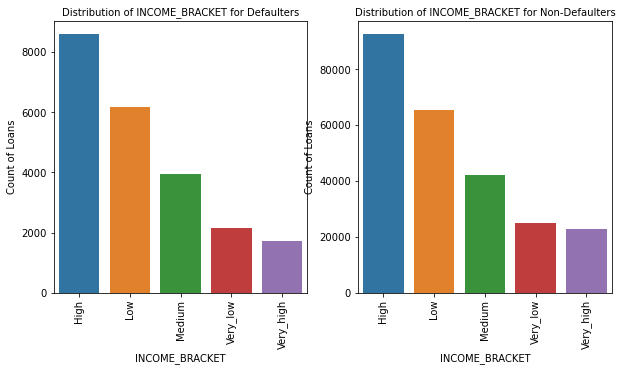

In [51]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\1655823795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'Rating1']=pd.cut(application_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\1655823795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'Rating1']=pd.cut(application_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low'

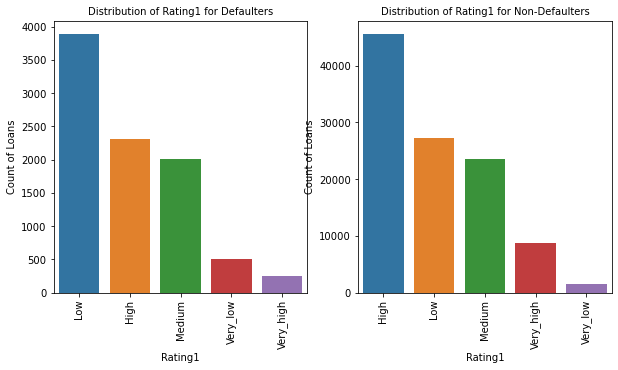

In [52]:
defaulters.loc[:,'Rating1']=pd.cut(application_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating1']=pd.cut(application_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
plot_charts('Rating1', label_rotation=True,horizontal_layout=True)

A large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\3440772481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\3440772481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low'

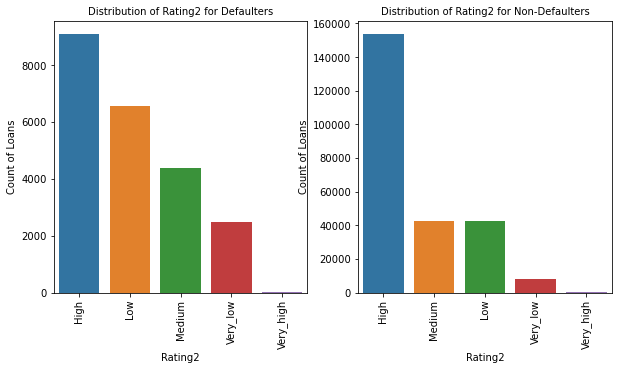

In [53]:
defaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
plot_charts('Rating2', label_rotation=True,horizontal_layout=True)

A large number of defaulters have Low rating, while a large number of non-defaulters have a high rating.

C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\304449080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\304449080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low'

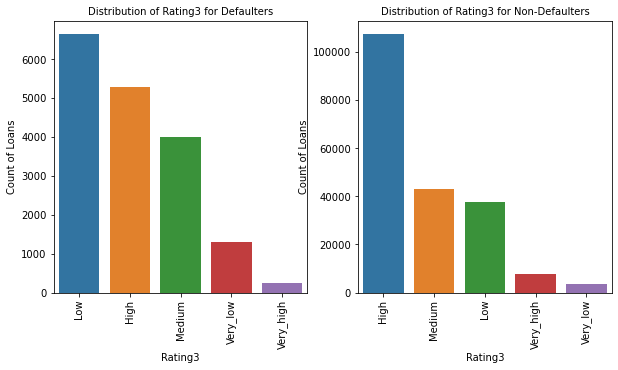

In [54]:
defaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
plot_charts('Rating3', label_rotation=True,horizontal_layout=True)

A large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\3963763069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
C:\Users\Swanko\AppData\Local\Temp\ipykernel_10904\3963763069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium',

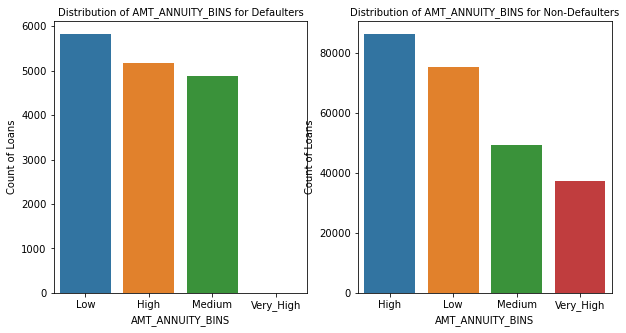

In [55]:
defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

maxinum number of defaulters have Low_annuity Values, while maximum number of non-defaulters have high annuity

In [56]:
age_data = application_data.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = application_data.loc[:,'DAYS_BIRTH']/ -365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


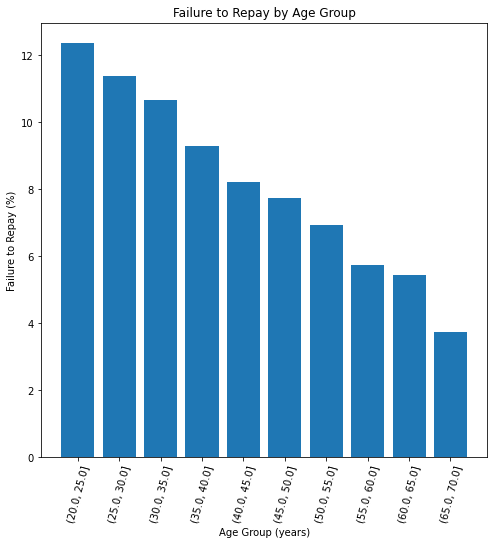

In [57]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Maximum Failure to Repay is in Age Group 20-25

## Analysis of Previous Application Dataset

In [60]:
#importing data from CSV file into pandas dataframe

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

 
previous_data = pd.read_csv('previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
previous_data.shape
application_data.dtypes.value_counts()

object     47
float64    46
int64       8
dtype: int64

We can see that there are:</font>

65 columns with dtype=float64</font>
41 columns with dtype=int64</font>
16 columns with dtype=object

In [62]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [63]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [64]:
previous_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

C:\Users\Swanko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


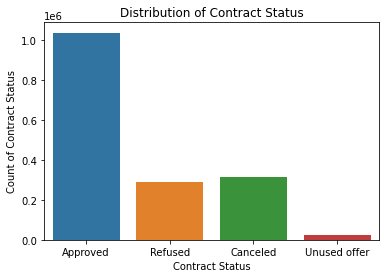

In [65]:
import matplotlib
sns.countplot(previous_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


In [66]:
prev_meta_data=meta_data(previous_data)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Percent,Unique,Data_Type
0,RATE_INTEREST_PRIVILEGED,1664263,99.643698,25,float64
1,RATE_INTEREST_PRIMARY,1664263,99.643698,148,float64
2,AMT_DOWN_PAYMENT,895844,53.636480,29278,float64
3,RATE_DOWN_PAYMENT,895844,53.636480,207033,float64
4,NAME_TYPE_SUITE,820405,49.119754,7,object
5,NFLAG_INSURED_ON_APPROVAL,673065,40.298129,2,float64
6,DAYS_TERMINATION,673065,40.298129,2830,float64
7,DAYS_LAST_DUE,673065,40.298129,2873,float64
8,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129,4605,float64
9,DAYS_FIRST_DUE,673065,40.298129,2892,float64


In [67]:
#dropping columns with more than 55% missing values 
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<55)].index)
previous_data=previous_data[cols_to_keep]
previous_data.describe()

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,SELLERPLACE_AREA,SK_ID_PREV,SK_ID_CURR,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,AMT_APPLICATION
count,7.743700e+05,774370.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,6.697402e+03,0.079637,0.332570,81992.343838,76582.403064,33767.774054,13826.269337,342209.855039,2.278473e+05,1.595512e+04,1.605408e+01,1.961140e+05,3.139511e+02,1.923089e+06,2.783572e+05,-8.806797e+02,9.964675e-01,1.248418e+01,1.752339e+05
std,2.092150e+04,0.107823,0.471134,153303.516729,149647.415123,106857.034789,72444.869708,88916.115834,3.153966e+05,1.478214e+04,1.456729e+01,3.185746e+05,7.127443e+03,5.325980e+05,1.028148e+05,7.790997e+02,5.932963e-02,3.334028e+00,2.927798e+05
min,-9.000000e-01,-0.000015,0.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,-2922.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000001e+06,1.000010e+05,-2.922000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,365243.000000,5.084100e+04,6.321780e+03,6.000000e+00,2.416050e+04,-1.000000e+00,1.461857e+06,1.893290e+05,-1.300000e+03,1.000000e+00,1.000000e+01,1.872000e+04
50%,1.638000e+03,0.051605,0.000000,-499.000000,-537.000000,-361.000000,-831.000000,365243.000000,1.123200e+05,1.125000e+04,1.200000e+01,8.054100e+04,3.000000e+00,1.923110e+06,2.787145e+05,-5.810000e+02,1.000000e+00,1.200000e+01,7.104600e+04
75%,7.740000e+03,0.108909,1.000000,-44.000000,-74.000000,129.000000,-411.000000,365243.000000,2.340000e+05,2.065842e+04,2.400000e+01,2.164185e+05,8.200000e+01,2.384280e+06,3.675140e+05,-2.800000e+02,1.000000e+00,1.500000e+01,1.803600e+05
max,3.060045e+06,1.000000,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01,6.905160e+06,4.000000e+06,2.845382e+06,4.562550e+05,-1.000000e+00,1.000000e+00,2.300000e+01,6.905160e+06


In [68]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(prev_meta_data[(prev_meta_data.Percent>0)&(prev_meta_data.Percent<15)])
low_missing

,Total,Percent,Unique,Data_Type
PRODUCT_COMBINATION,346,0.020716,17,object
AMT_CREDIT,1,0.000060,86803,float64


Both of these columns should not be imputed with any values

In [69]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']

In [70]:
def convert_data(previous_data, cols_to_convert):
    for y in cols_to_convert:
        previous_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return previous_data
convert_data(previous_data, cols_to_convert)
previous_data.dtypes.value_counts()

object     18
float64    12
int64       5
dtype: int64

In [71]:
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']
unused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Unused Offer']
percentage_approved=(len(approved)*100)/len(previous_data)
percentage_refused=(len(refused)*100)/len(previous_data)
percentage_canceled=(len(canceled)*100)/len(previous_data)
percentage_unused=(len(unused)*100)/len(previous_data)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.07 %
The Percentage of people whose loans have been Refused is: 17.4 %
The Percentage of people whose loans have been Canceled is: 18.94 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [72]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [73]:
previous_data.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'PRODUCT_COMBINATION',
       'NAME_YIELD_GROUP', 'NAME_PORTFOLIO', 'NAME_SELLER_INDUSTRY',
       'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'NFLAG_LAST_APPL_IN_DAY',
       'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE'],
      dtype='object')

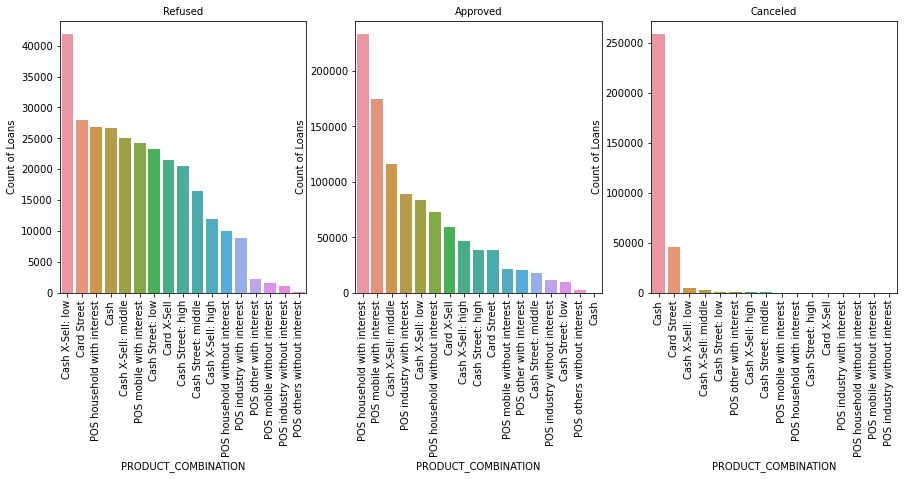

In [74]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

We observe most number of loans were approved for POS household with interest.

Most number of refused loans were of Cash X-Sell: Low Product combination

Most Canceled loans were Cash loans

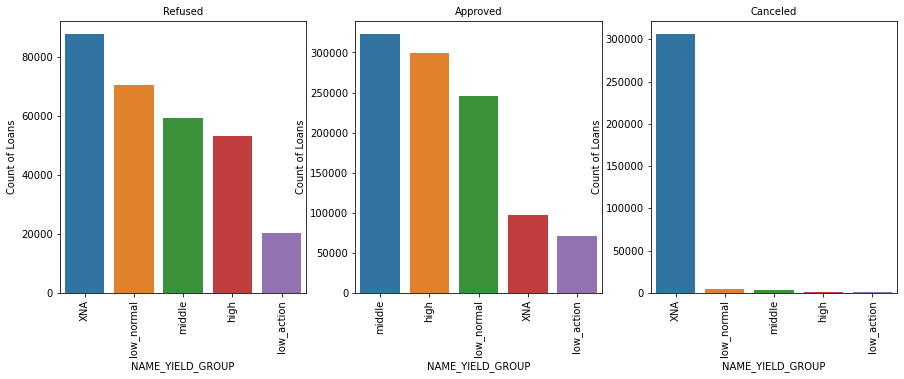

In [75]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

Most approved loans were from Middle Yield Goup

Most refused loans were from Yield Goups Not specified

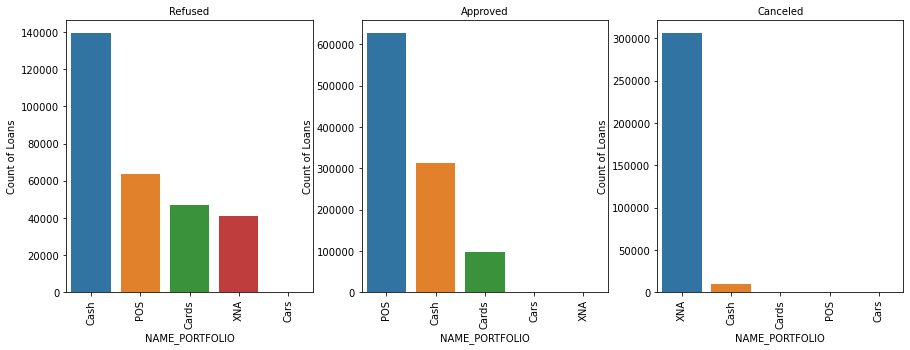

In [76]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

Most approved loans were POS

Most refused loans were Cash

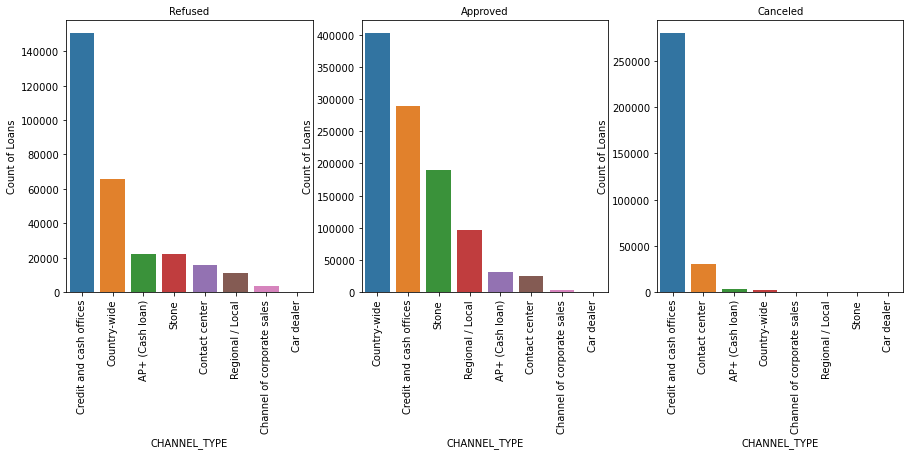

In [77]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

Most approved loans were from Country-wide Channel

Most refused loans were from Credit and Cash Offices Channel

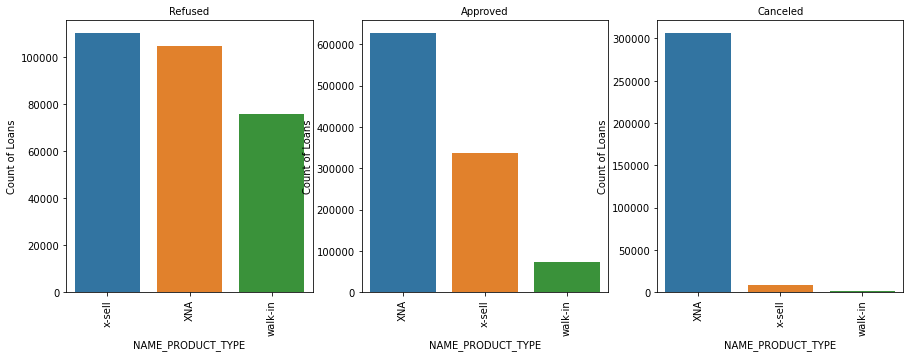

In [78]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

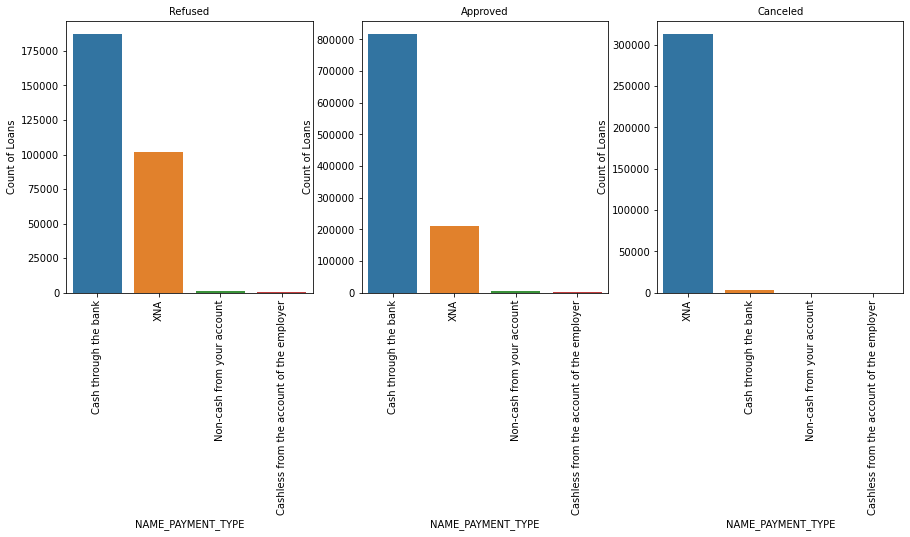

In [79]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

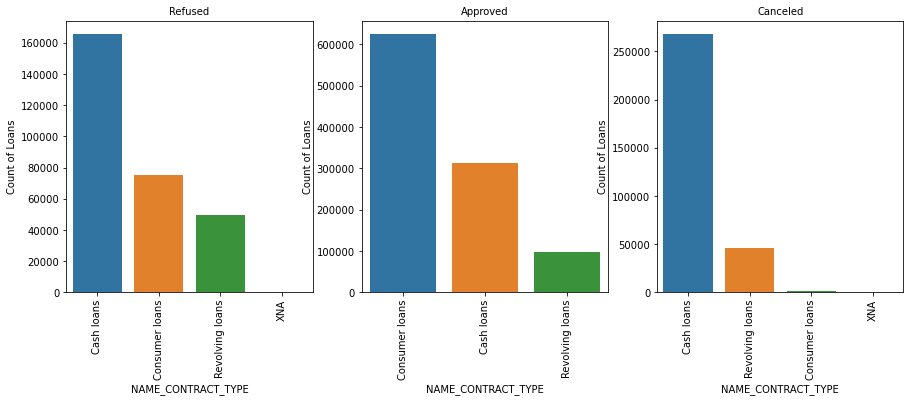

In [80]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

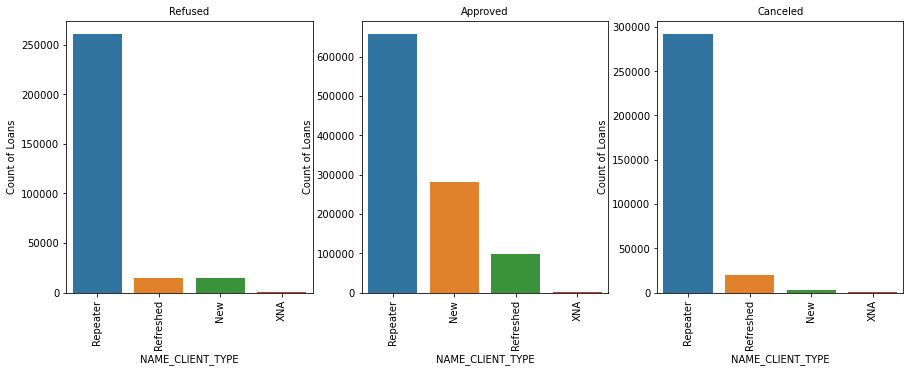

In [81]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

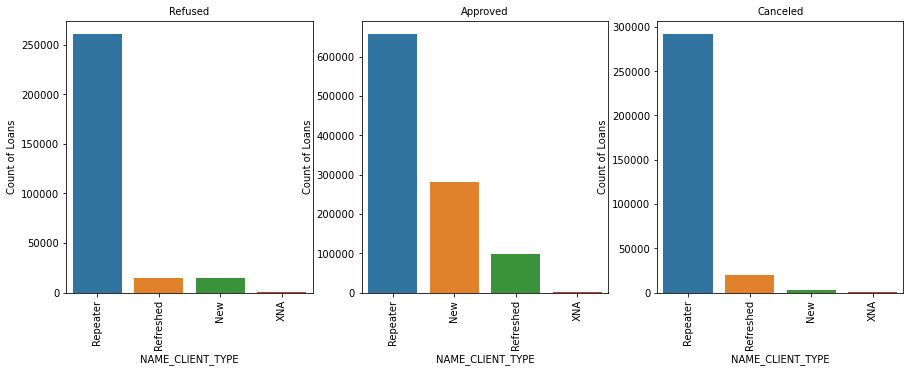

In [82]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

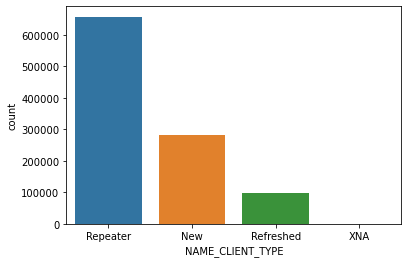

In [83]:
sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=previous_data)

## Removing Outliers

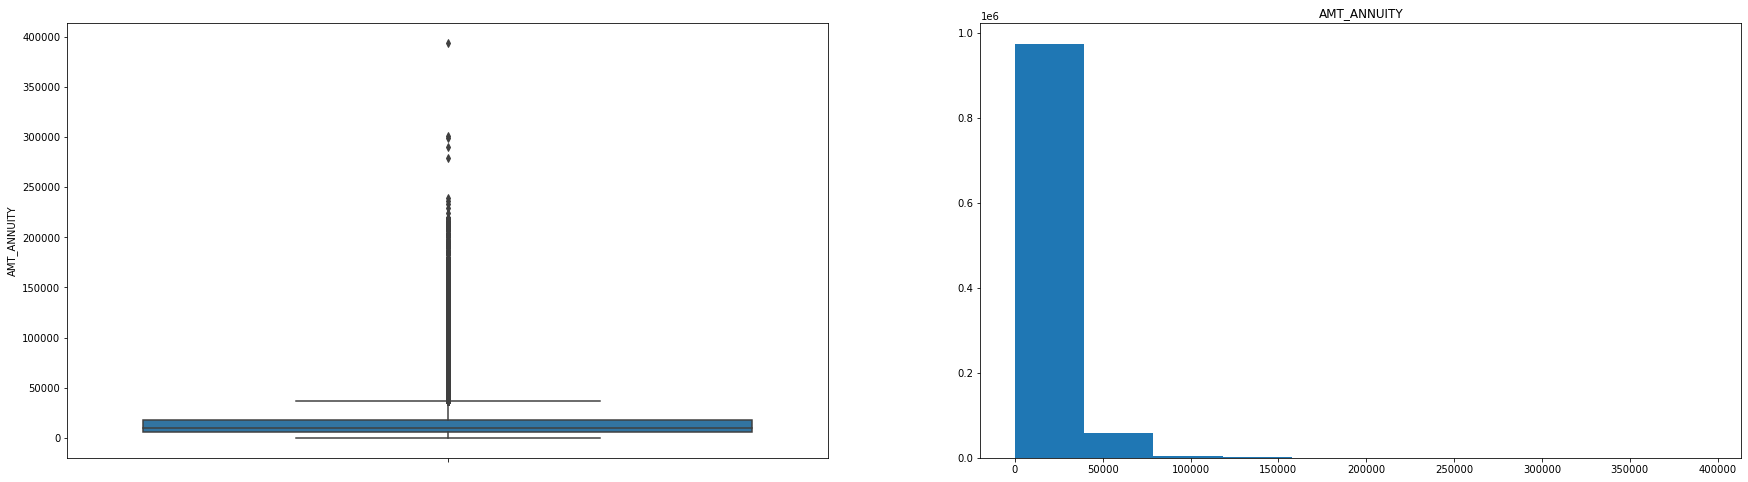

In [85]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

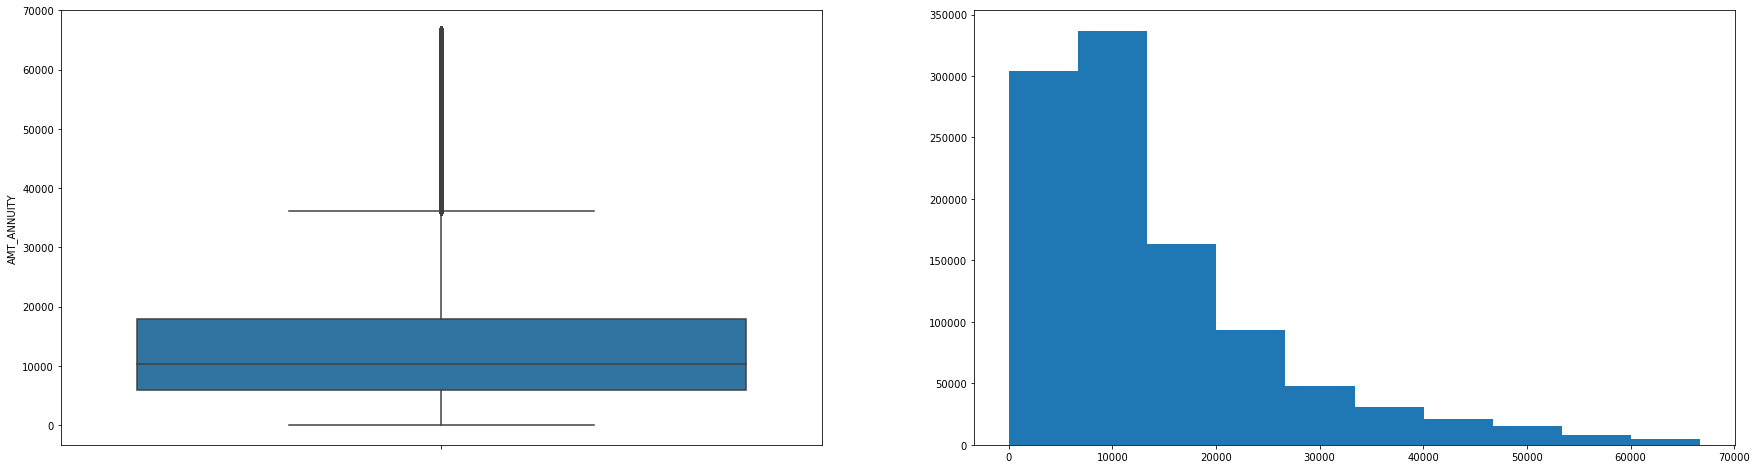

In [86]:
approved=approved[approved.AMT_ANNUITY<np.nanpercentile(approved['AMT_ANNUITY'], 99)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_ANNUITY boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
ax.set_title('AMT_ANNUITY')

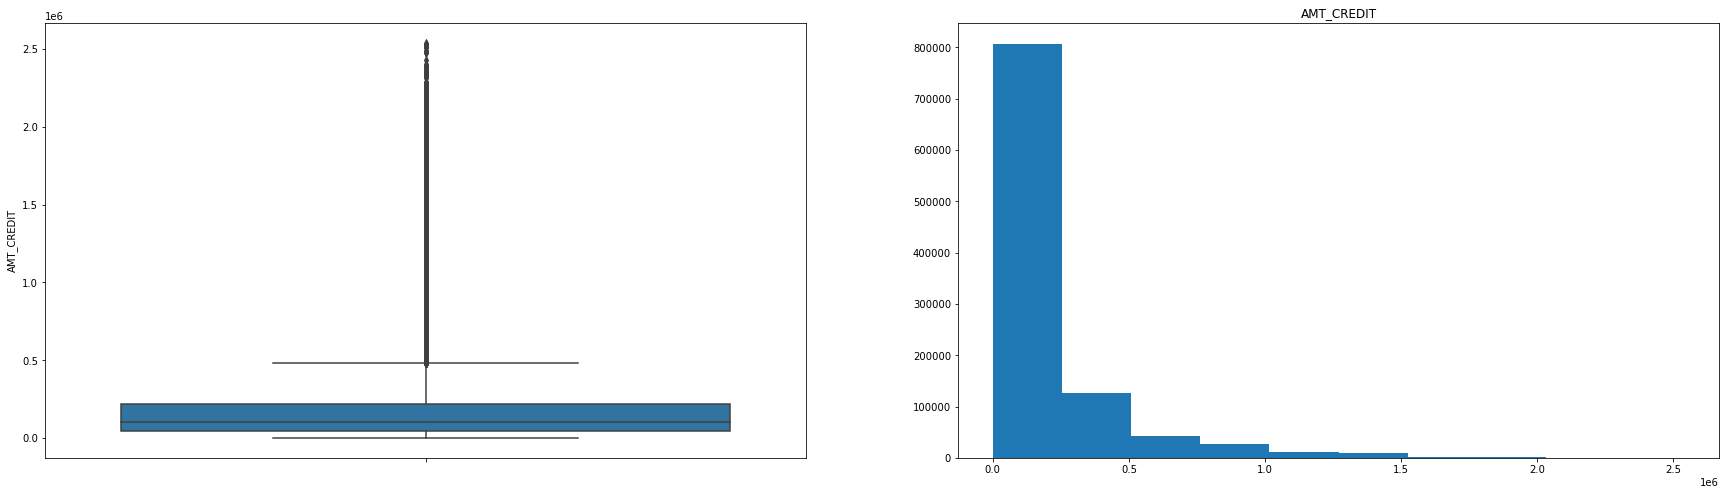

In [87]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

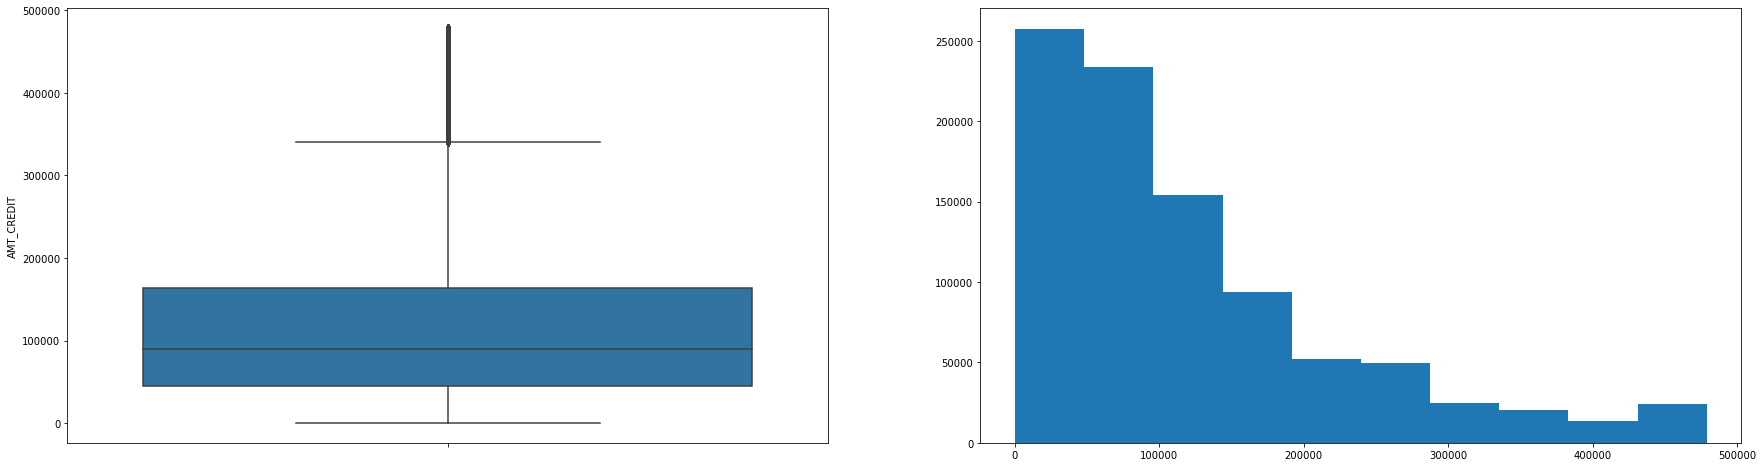

In [88]:
approved=approved[approved.AMT_CREDIT<np.nanpercentile(approved['AMT_CREDIT'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_CREDIT boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
ax.set_title('AMT_CREDIT')

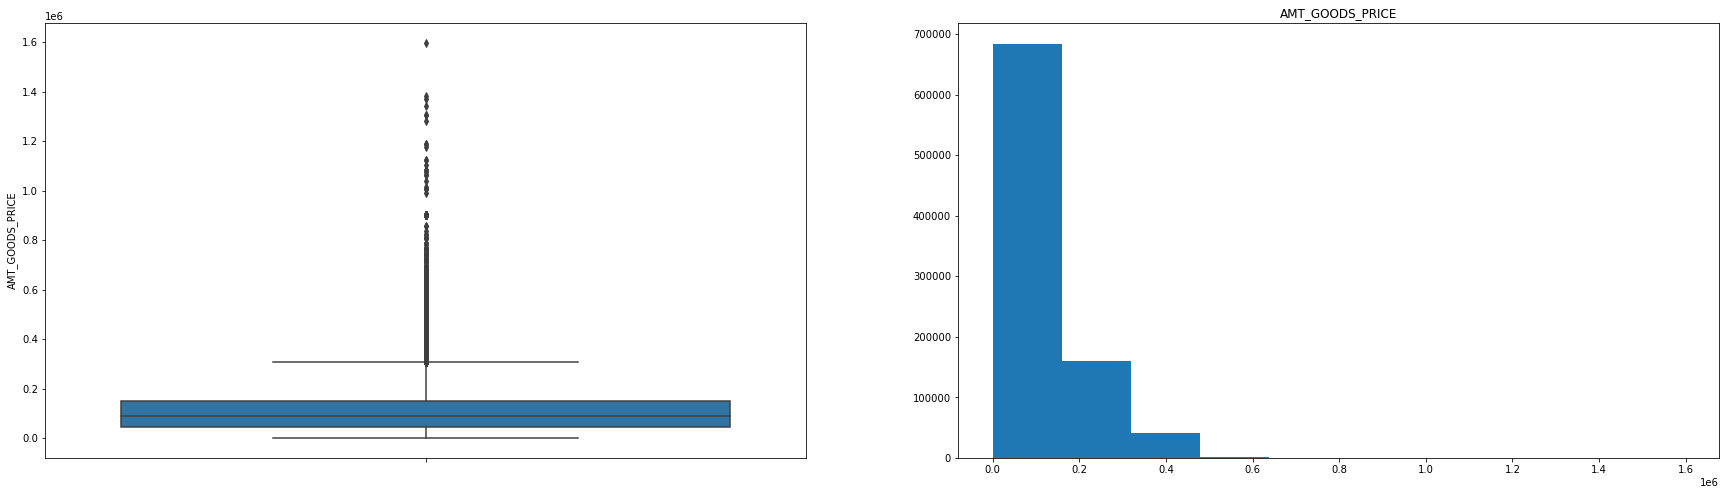

In [89]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

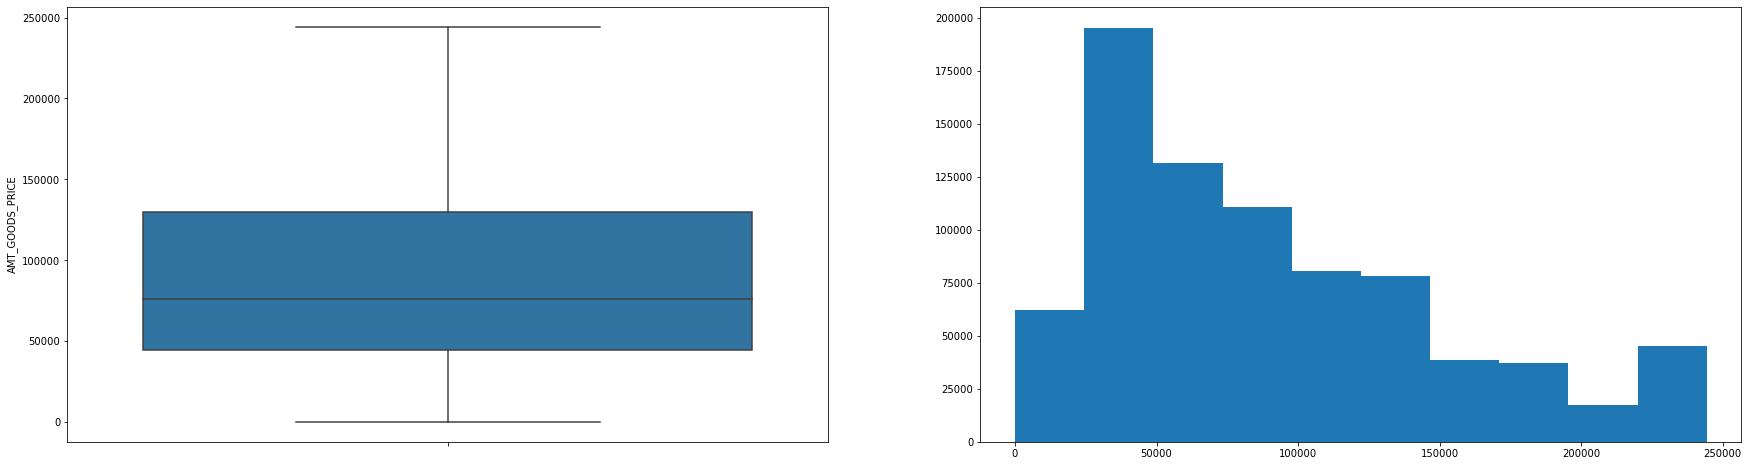

In [90]:
approved=approved[approved.AMT_GOODS_PRICE<np.nanpercentile(approved['AMT_GOODS_PRICE'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_GOODS_PRICE boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
ax.set_title('AMT_GOODS_PRICE')

### BIVARIATE ANALYSIS OF VARIABLES

In [91]:
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.783,-0.079,-0.080,-0.001,-0.024,-0.007,0.252,0.200,-0.149,0.052,-0.070,0.252
RATE_DOWN_PAYMENT,0.783,1.000,-0.146,-0.149,-0.011,-0.041,-0.008,-0.138,-0.123,-0.300,-0.306,-0.209,-0.138
DAYS_TERMINATION,-0.079,-0.146,1.000,0.964,0.467,0.383,-0.346,0.137,-0.059,0.008,0.153,0.477,0.137
DAYS_LAST_DUE,-0.080,-0.149,0.964,1.000,0.470,0.431,-0.307,0.136,-0.062,0.009,0.152,0.478,0.136
DAYS_LAST_DUE_1ST_VERSION,-0.001,-0.011,0.467,0.470,1.000,0.580,-0.739,0.002,-0.184,-0.370,0.006,0.231,0.002
DAYS_FIRST_DUE,-0.024,-0.041,0.383,0.431,0.580,1.000,-0.040,-0.034,-0.122,-0.220,-0.030,0.222,-0.034
DAYS_FIRST_DRAWING,-0.007,-0.008,-0.346,-0.307,-0.739,-0.040,1.000,-0.024,0.126,0.277,-0.025,-0.155,-0.024
AMT_GOODS_PRICE,0.252,-0.138,0.137,0.136,0.002,-0.034,-0.024,1.000,0.746,0.430,0.970,0.241,1.000
AMT_ANNUITY,0.200,-0.123,-0.059,-0.062,-0.184,-0.122,0.126,0.746,1.000,0.029,0.721,0.170,0.746
CNT_PAYMENT,-0.149,-0.300,0.008,0.009,-0.370,-0.220,0.277,0.430,0.029,1.000,0.499,0.045,0.430


In [92]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_DOWN_PAYMENT           AMT_DOWN_PAYMENT     1.000000
AMT_APPLICATION            AMT_CREDIT           0.969696
DAYS_TERMINATION           DAYS_LAST_DUE        0.964436
AMT_DOWN_PAYMENT           RATE_DOWN_PAYMENT    0.782632
AMT_GOODS_PRICE            AMT_ANNUITY          0.746479
AMT_ANNUITY                AMT_CREDIT           0.721244
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE       0.579953
CNT_PAYMENT                AMT_CREDIT           0.498715
DAYS_LAST_DUE              DAYS_DECISION        0.478279
DAYS_TERMINATION           DAYS_DECISION        0.476869
dtype: float64

In [93]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION              DAYS_FIRST_DRAWING          -0.154523
AMT_ANNUITY                DAYS_LAST_DUE_1ST_VERSION   -0.184133
DAYS_DECISION              RATE_DOWN_PAYMENT           -0.208688
CNT_PAYMENT                DAYS_FIRST_DUE              -0.220464
RATE_DOWN_PAYMENT          CNT_PAYMENT                 -0.299571
AMT_CREDIT                 RATE_DOWN_PAYMENT           -0.305896
DAYS_LAST_DUE              DAYS_FIRST_DRAWING          -0.306932
DAYS_TERMINATION           DAYS_FIRST_DRAWING          -0.345834
DAYS_LAST_DUE_1ST_VERSION  CNT_PAYMENT                 -0.370409
                           DAYS_FIRST_DRAWING          -0.739219
dtype: float64

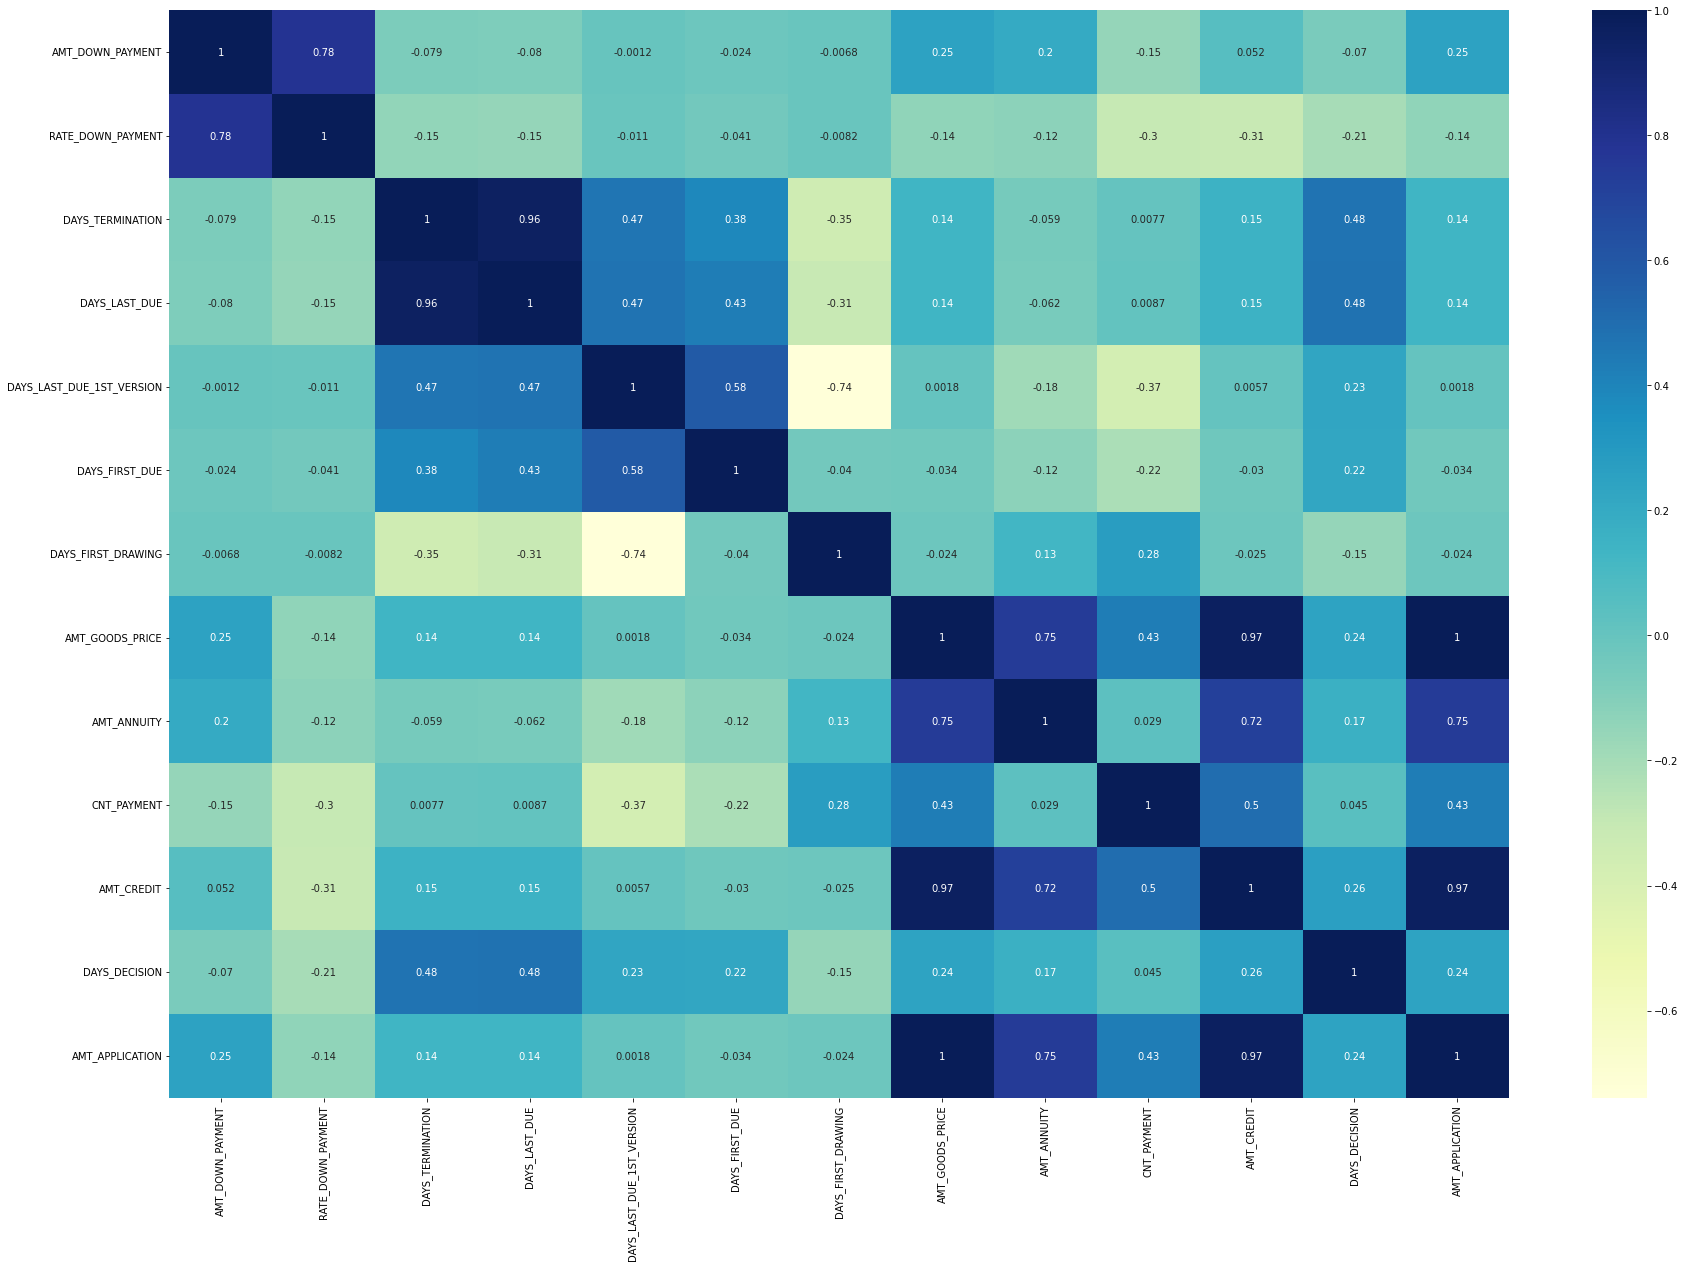

In [94]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()


In [95]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.416,0.536,0.317,0.095,0.386,0.008,0.536
RATE_DOWN_PAYMENT,0.416,1.000,-0.024,-0.084,-0.242,-0.112,-0.225,-0.024
AMT_GOODS_PRICE,0.536,-0.024,1.000,0.823,0.658,0.992,0.334,1.000
AMT_ANNUITY,0.317,-0.084,0.823,1.000,0.427,0.820,0.287,0.818
CNT_PAYMENT,0.095,-0.242,0.658,0.427,1.000,0.677,0.306,0.670
AMT_CREDIT,0.386,-0.112,0.992,0.820,0.677,1.000,0.270,0.984
DAYS_DECISION,0.008,-0.225,0.334,0.287,0.306,0.270,1.000,0.265
AMT_APPLICATION,0.536,-0.024,1.000,0.818,0.670,0.984,0.265,1.000


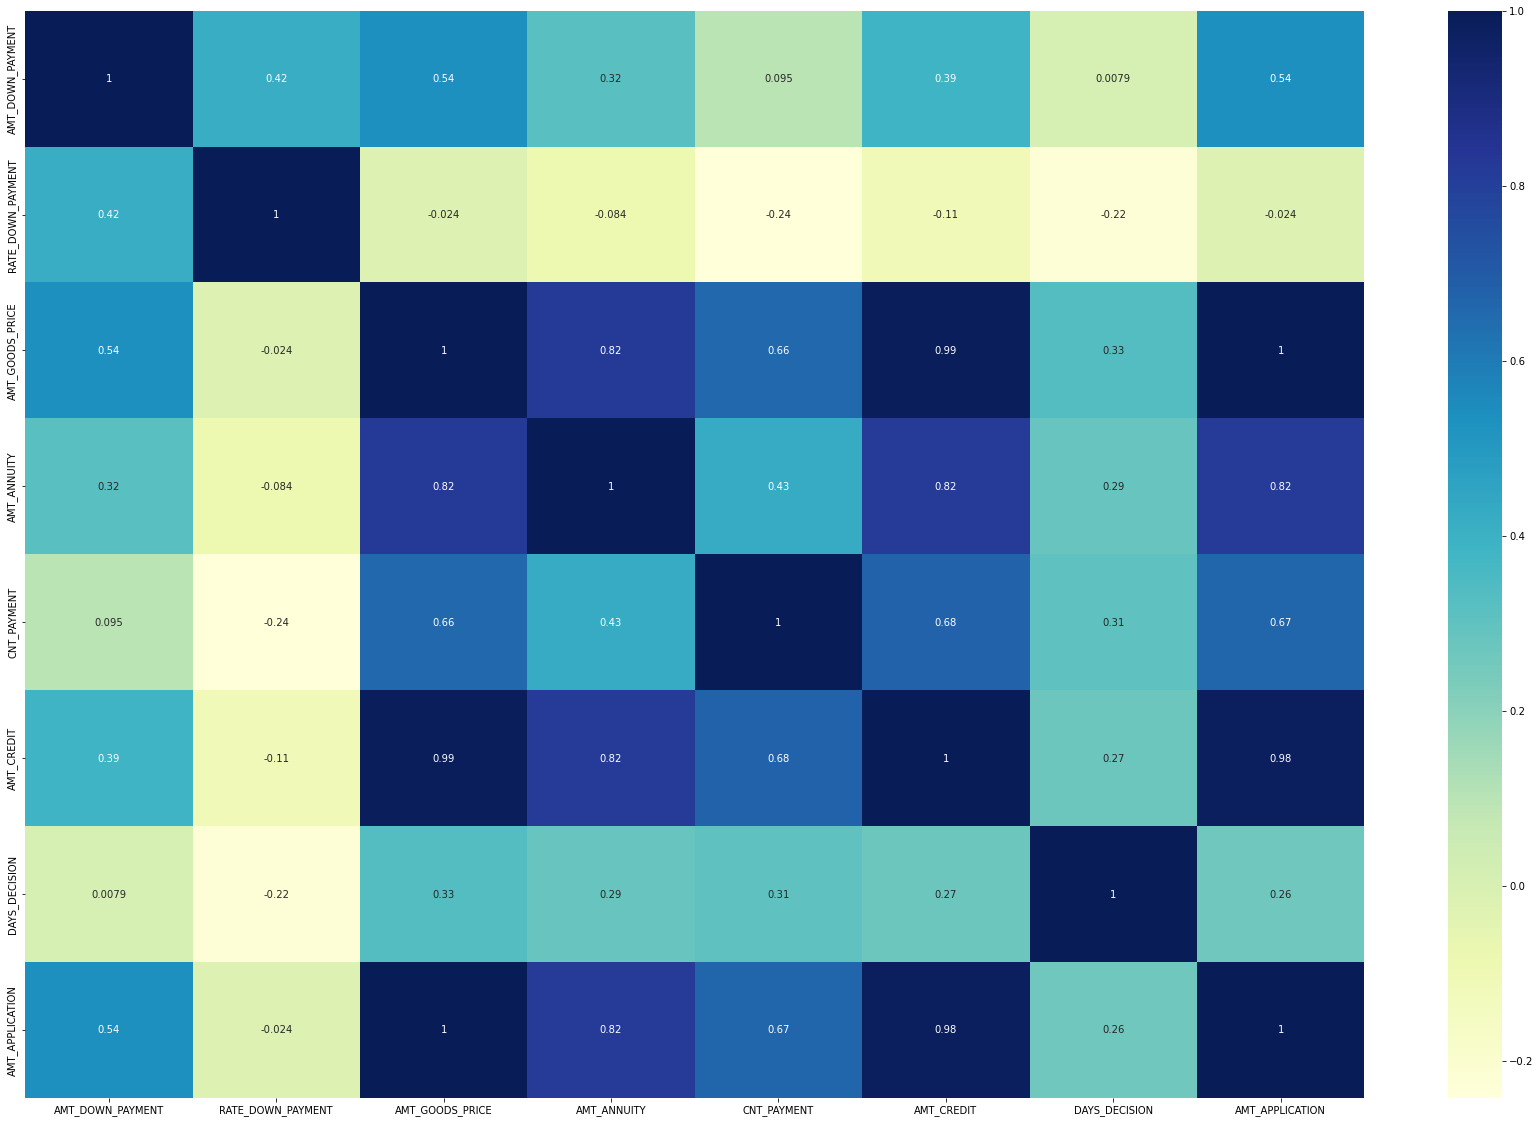

In [96]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [97]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_DOWN_PAYMENT  AMT_DOWN_PAYMENT    1.000000
AMT_GOODS_PRICE   AMT_APPLICATION     0.999699
                  AMT_CREDIT          0.991777
AMT_CREDIT        AMT_APPLICATION     0.983785
AMT_ANNUITY       AMT_GOODS_PRICE     0.822538
AMT_CREDIT        AMT_ANNUITY         0.819867
AMT_ANNUITY       AMT_APPLICATION     0.817869
CNT_PAYMENT       AMT_CREDIT          0.677433
AMT_APPLICATION   CNT_PAYMENT         0.669782
AMT_GOODS_PRICE   CNT_PAYMENT         0.658065
dtype: float64

In [98]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_ANNUITY       DAYS_DECISION        0.286620
DAYS_DECISION     AMT_CREDIT           0.270099
                  AMT_APPLICATION      0.264581
AMT_DOWN_PAYMENT  CNT_PAYMENT          0.094697
DAYS_DECISION     AMT_DOWN_PAYMENT     0.007927
AMT_GOODS_PRICE   RATE_DOWN_PAYMENT   -0.023624
AMT_ANNUITY       RATE_DOWN_PAYMENT   -0.084484
AMT_CREDIT        RATE_DOWN_PAYMENT   -0.111684
DAYS_DECISION     RATE_DOWN_PAYMENT   -0.224665
CNT_PAYMENT       RATE_DOWN_PAYMENT   -0.242238
dtype: float64

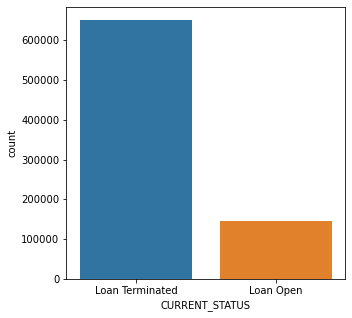

In [99]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'
    
approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated) 
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

In [100]:
new_df= previous_data.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)
merged_df1=pd.merge(new_df, pd.DataFrame(application_data[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]
merged_df1.head()

,SK_ID_CURR,Count of Refused Loans,TARGET
0,100002,1,1
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0


In [101]:
merged_df1[merged_df1['TARGET']==0].head()

,SK_ID_CURR,Count of Refused Loans,TARGET
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0
5,100008,5,0


Driver Variables

EXT_SOURCE_1

EXT_SOURCE_2

EXT_SOURCE_3

DAYS_BIRTH

AMT_ANNUITY